In [65]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np

np.random.seed(0)

In [71]:
soil = pd.read_csv('D:/2020/soil data/sp/sw/ph.csv')

In [72]:
print(soil.head())

   VL  L   M  H  VH Class
0   0  0   0  0  26    PH
1   0  6  11  0  33    PH
2   0  0   1  0  14    PH
3   0  0   0  0  42    PH
4   0  1   0  0  23    PH


In [73]:
print(soil.shape)

(188, 6)


In [74]:
soil.describe()

,VL,L,M,H,VH
count,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.122340,18.356383,8.212766,1.611702,25.797872
std,8.545001,28.275301,11.886605,15.429442,40.719486
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.500000,3.000000,0.000000,3.000000
75%,6.000000,26.000000,11.250000,0.000000,39.250000
max,76.000000,177.000000,77.000000,211.000000,225.000000


In [75]:
print(soil['Class'].unique())

['PH' 'OC']


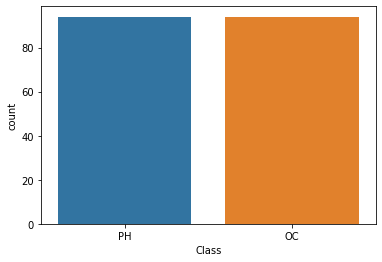

In [76]:
sns.countplot(soil['Class'],label="count")
plot.show()

In [80]:
print(soil['VL'].unique())

[ 0  1  2  9  3  7 22 10 76 13  4 36 12 20  6  8  5 11 15 46 18 32 21 16
 14]


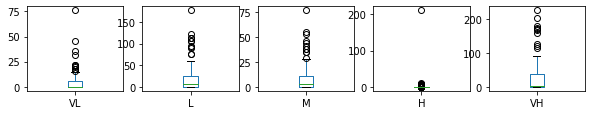

In [81]:
soil.drop('Class',axis=1).plot(kind='box',subplots=True,layout=(5,5), sharex=False, sharey=False, figsize=(10,9))

plot.savefig('soil_box')

plot.show()


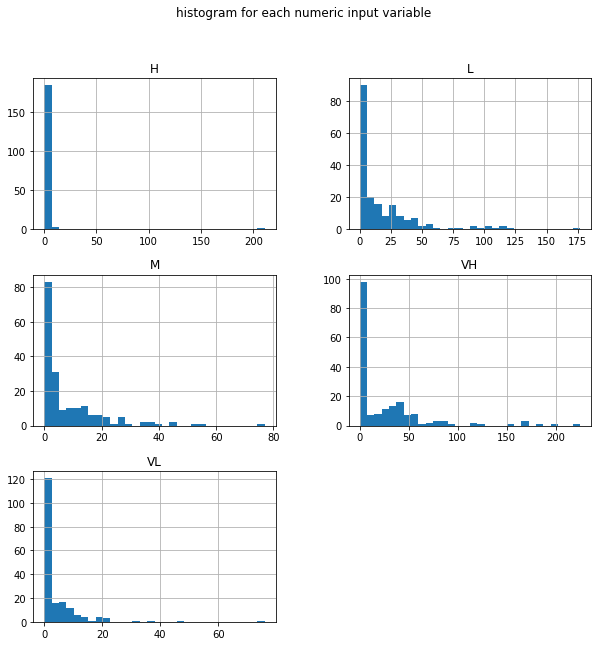

In [82]:
import pylab as pl

soil.drop('Class',axis=1).hist(bins=30, figsize=(10,10))

plot.suptitle("histogram for each numeric input variable")

plot.savefig('soil_hist')

plot.show()

In [83]:
soil_names = ['VL',  'VH','L','H', 'M' ]

X = soil[soil_names]

Y = soil['Class']

In [84]:
soil.dropna()

,VL,L,M,H,VH,Class
0,0,0,0,0,26,PH
1,0,6,11,0,33,PH
2,0,0,1,0,14,PH
3,0,0,0,0,42,PH
4,0,1,0,0,23,PH
5,0,1,7,0,47,PH
6,0,0,1,0,54,PH
7,0,3,16,0,115,PH
8,0,0,0,0,43,PH
9,0,10,41,0,202,PH


In [85]:
print(soil.groupby('Class').size())

Class
OC    94
PH    94
dtype: int64


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20,random_state=1)

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [88]:
# logistic regression

from sklearn.datasets import make_blobs

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


X, Y = make_blobs(n_samples=100, centers=2, n_features=2)

model = LogisticRegression(solver='lbfgs',multi_class='auto')

model.fit(X,Y)

logreg = LogisticRegression()

logreg.fit(X_train,Y_train)


predictions = logreg.predict(X_test)

classification_report(Y_test,predictions)



print('Accuracy of Logistic regression classifier on training set:{:.2f}'.format(logreg.score(X_train,Y_train)))

print('Accuracy of Logistic regression classifier on test set:{:.2f}'.format(logreg.score(X_test,Y_test)))



plot.suptitle("histogram for each numeric input variable")

plot.savefig('soil_hist')

plot.show()


Accuracy of Logistic regression classifier on training set:0.97
Accuracy of Logistic regression classifier on test set:0.97


<Figure size 432x288 with 0 Axes>

In [89]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train,Y_train)

print('Accuracy of Decision Tree classifier on training set: {:.1f}'.format(clf.score(X_train,Y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.1f}'.format(clf.score(X_test,Y_test)))





Accuracy of Decision Tree classifier on training set: 1.0
Accuracy of Decision Tree classifier on test set: 1.0


In [90]:

from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier()

knn.fit(X_train,Y_train)

print('Accuracy of K-NN classifier on training set: {:.1f}'.format(knn.score(X_train,Y_train)))

print('Accuracy of K-NN classifier on test set: {:.1f}'.format(knn.score(X_test,Y_test)))

Accuracy of K-NN classifier on training set: 1.0
Accuracy of K-NN classifier on test set: 0.9


In [91]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train,Y_train)

print('Accuracy of GNB classifier on training set: {:.1f}'.format(gnb.score(X_train,Y_train)))

print('Accuracy of GNB classifier on test set: {:.1f}'.format(gnb.score(X_test,Y_test)))

Accuracy of GNB classifier on training set: 1.0
Accuracy of GNB classifier on test set: 0.9


In [92]:
# confusion matrix for knn classifier

In [93]:
print(__doc__)
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn import metrics

# prepare dataset
X, Y = make_blobs(n_samples=100, centers=2, n_features=2)
# create and configure model
model = SVC()

svm = SVC()

svm.fit(X_train,Y_train)

print('Accuracy of SVM classifier on training set: {:.1f}'.format(svm.score(X_train,Y_train)))

print('Accuracy of SVM classifier on test set: {:.1f}'.format(svm.score(X_test,Y_test)))

# fit model
model.fit(X, Y)

Y_pred=svm.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(Y_test,Y_pred))



Automatically created module for IPython interactive environment
Accuracy of SVM classifier on training set: 1.0
Accuracy of SVM classifier on test set: 0.9
Accuracy Score:
0.9473684210526315


In [94]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[17  1]
 [ 1 19]]
              precision    recall  f1-score   support

          OC       0.94      0.94      0.94        18
          PH       0.95      0.95      0.95        20

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [95]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




result = confusion_matrix(Y_test, Y_pred)






print("Confusion Matrix:")
print(result)
result1 = classification_report(Y_test, Y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(Y_test,Y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[18  0]
 [ 1 19]]
Classification Report:
              precision    recall  f1-score   support

          OC       0.95      1.00      0.97        18
          PH       1.00      0.95      0.97        20

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Accuracy: 0.9736842105263158
